# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Bryan Herdianto
- **Email:** bryan.herdianto17@gmail.com
- **ID Dicoding:** bryanherdianto

## Menentukan Pertanyaan Bisnis

- Stasiun manakah yang memiliki konsentrasi SO2 paling besar? Sertakan juga grafik mengenai 5 stasiun paling besar akan konsentrasi SO2.
- Bagaimana perkembangan konsentrasi SO2 seiring waktu pada stasiun Aotizhongxin?
- Berapakah nilai konsentrasi O3 yang paling besar pada stasiun Gucheng?
- Berapa jumlah stasiun pada dataset yang tersedia?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
air_quality1 = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/air_quality_dashboard/main/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
air_quality2 = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/air_quality_dashboard/main/data/PRSA_Data_Changping_20130301-20170228.csv')
air_quality3 = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/air_quality_dashboard/main/data/PRSA_Data_Dingling_20130301-20170228.csv')
air_quality4 = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/air_quality_dashboard/main/data/PRSA_Data_Dongsi_20130301-20170228.csv')
air_quality5 = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/air_quality_dashboard/main/data/PRSA_Data_Guanyuan_20130301-20170228.csv')
air_quality6 = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/air_quality_dashboard/main/data/PRSA_Data_Gucheng_20130301-20170228.csv')
air_quality7 = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/air_quality_dashboard/main/data/PRSA_Data_Huairou_20130301-20170228.csv')
air_quality8 = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/air_quality_dashboard/main/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
air_quality9 = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/air_quality_dashboard/main/data/PRSA_Data_Shunyi_20130301-20170228.csv')
air_quality10 = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/air_quality_dashboard/main/data/PRSA_Data_Tiantan_20130301-20170228.csv')
air_quality11 = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/air_quality_dashboard/main/data/PRSA_Data_Wanliu_20130301-20170228.csv')
air_quality12 = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/air_quality_dashboard/main/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

# Ukuran dari satu dataset
print(air_quality1.shape)

air_quality = pd.concat([air_quality1, air_quality2, air_quality3, air_quality4,
                       air_quality5, air_quality6, air_quality7, air_quality8,
                       air_quality9, air_quality10, air_quality11, air_quality12], ignore_index=True)

# Ukuran dari dataset yang telah digabung secara baris
print(air_quality.shape)

(35064, 18)
(420768, 18)


In [3]:
# Cek 5 data pertama pada dataset
air_quality.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## Pengenalan Masing-Masing Kolom
The meaning of each column in the given pandas DataFrame:

1. **`datetime`**: This column likely represents the timestamp or date and time when the data was recorded. It could be in a specific format (e.g., YYYY-MM-DD HH:MM:SS) or as a Unix timestamp (seconds since January 1, 1970).

2. **`PM2.5`**: This column refers to the concentration of fine particulate matter (PM) with a diameter of 2.5 micrometers or smaller. PM2.5 is associated with air pollution and can have adverse health effects.

3. **`PM10`**: Similar to PM2.5, this column represents the concentration of larger particulate matter with a diameter of 10 micrometers or smaller.

4. **`SO2`**: Stands for sulfur dioxide. It's a gas produced from burning fossil fuels (e.g., coal, oil) and industrial processes. SO2 contributes to air pollution and can cause respiratory issues.

5. **`NO2`**: Represents nitrogen dioxide, another harmful gas found in vehicle emissions and industrial activities. High levels of NO2 can irritate the respiratory system.

6. **`CO`**: Denotes carbon monoxide, a colorless and odorless gas produced by incomplete combustion. It can be lethal in high concentrations.

7. **`O3`**: Refers to ozone, which exists in the Earth's atmosphere. While beneficial in the upper atmosphere (protecting against UV radiation), ground-level ozone is a pollutant and can harm lung function.

8. **`TEMP`**: Indicates the temperature (usually in degrees Celsius or Fahrenheit) at the time of measurement.

9. **`PRES`**: Represents atmospheric pressure (e.g., in hPa or millibars). It affects weather patterns and can indicate changes in weather conditions.

10. **`DEWP`**: Stands for dew point temperature. It's the temperature at which air becomes saturated with moisture and dew forms.

11. **`RAIN`**: Indicates the amount of rainfall (usually in millimeters or inches) during the specified time period.

12. **`wd`**: Likely stands for wind direction. It provides information about the prevailing wind direction (e.g., north, south, east, west).

13. **`WSPM`**: Represents wind speed (usually in meters per second or kilometers per hour).

14. **`station`**: This column might specify the monitoring station or location where the data was collected. It helps identify the source of the measurements.

In [4]:
# Cek info dari dataset yang ada
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
# Cek describe dari dataset yang ada
air_quality.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Assessing Data

In [6]:
# Cek missing value
print(air_quality.isna().sum())

# Cek duplicate data
print(air_quality.duplicated().sum())

# Cek outlier
def cekOutlier(data):
  q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
  iqr = q75 - q25
  cut_off = iqr * 1.5
  minimum, maximum = q25 - cut_off, q75 + cut_off

  outliers = [x for x in data if x < minimum or x > maximum]

  return outliers

outlier_pm25 = cekOutlier(air_quality['PM2.5'])
outlier_pm10 = cekOutlier(air_quality['PM10'])
outlier_so2 = cekOutlier(air_quality['SO2'])
outlier_no2 = cekOutlier(air_quality['NO2'])
outlier_co = cekOutlier(air_quality['CO'])
outlier_o3 = cekOutlier(air_quality['O3'])
outlier_temp = cekOutlier(air_quality['TEMP'])
outlier_pres = cekOutlier(air_quality['PRES'])
outlier_dewp = cekOutlier(air_quality['DEWP'])
outlier_rain = cekOutlier(air_quality['RAIN'])
outlier_wspm = cekOutlier(air_quality['WSPM'])

print(outlier_pm25)
print(outlier_pm10)
print(outlier_so2)
print(outlier_no2)
print(outlier_co)
print(outlier_o3)
print(outlier_temp)
print(outlier_pres)
print(outlier_dewp)
print(outlier_rain)
print(outlier_wspm)

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64
0
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


### Cleaning Data

In [7]:
# Clean duplicate data
air_quality.drop_duplicates(inplace=True)

# Clean missing data with number type
air_quality['PM2.5'].fillna(value=air_quality['PM2.5'].mean(), inplace=True)
air_quality['PM10'].fillna(value=air_quality['PM10'].mean(), inplace=True)
air_quality['SO2'].fillna(value=air_quality['SO2'].mean(), inplace=True)
air_quality['NO2'].fillna(value=air_quality['NO2'].mean(), inplace=True)
air_quality['CO'].fillna(value=air_quality['CO'].mean(), inplace=True)
air_quality['O3'].fillna(value=air_quality['O3'].mean(), inplace=True)
air_quality['TEMP'].fillna(value=air_quality['TEMP'].mean(), inplace=True)
air_quality['PRES'].fillna(value=air_quality['PRES'].mean(), inplace=True)
air_quality['DEWP'].fillna(value=air_quality['DEWP'].mean(), inplace=True)
air_quality['RAIN'].fillna(value=air_quality['RAIN'].mean(), inplace=True)
air_quality['WSPM'].fillna(value=air_quality['WSPM'].mean(), inplace=True)

# Clean missing data with object type
air_quality['wd'].fillna(air_quality['wd'].value_counts().index[0])

# Clean outlier
def findMinOutlierCondition(col):
  Q1 = (air_quality[col]).quantile(0.25)
  Q3 = (air_quality[col]).quantile(0.75)
  IQR = Q3 - Q1

  minimum = Q1 - (1.5 * IQR)

  kondisi_lower_than = air_quality[col] < minimum

  return kondisi_lower_than

def findMaxOutlierCondition(col):
  Q1 = (air_quality[col]).quantile(0.25)
  Q3 = (air_quality[col]).quantile(0.75)
  IQR = Q3 - Q1

  maximum = Q3 + (1.5 * IQR)

  kondisi_more_than = air_quality[col] > maximum

  return kondisi_more_than

def findMinOutlier(col):
  Q1 = (air_quality[col]).quantile(0.25)
  Q3 = (air_quality[col]).quantile(0.75)
  IQR = Q3 - Q1

  minimum = Q1 - (1.5 * IQR)

  return minimum

def findMaxOutlier(col):
  Q1 = (air_quality[col]).quantile(0.25)
  Q3 = (air_quality[col]).quantile(0.75)
  IQR = Q3 - Q1

  maximum = Q3 + (1.5 * IQR)

  return maximum

# Menggunakan metode loc untuk mengganti nilai dari kolom tersebut saja (mask mengubah nilai dari seluruh kolom)
air_quality.loc[findMinOutlierCondition('PM2.5'), 'PM2.5'] = findMinOutlier('PM2.5')
air_quality.loc[findMaxOutlierCondition('PM2.5'), 'PM2.5'] = findMaxOutlier('PM2.5')

air_quality.loc[findMinOutlierCondition('PM10'), 'PM10'] = findMinOutlier('PM10')
air_quality.loc[findMaxOutlierCondition('PM10'), 'PM10'] = findMaxOutlier('PM10')

air_quality.loc[findMinOutlierCondition('SO2'), 'SO2'] = findMinOutlier('SO2')
air_quality.loc[findMaxOutlierCondition('SO2'), 'SO2'] = findMaxOutlier('SO2')

air_quality.loc[findMinOutlierCondition('NO2'), 'NO2'] = findMinOutlier('NO2')
air_quality.loc[findMaxOutlierCondition('NO2'), 'NO2'] = findMaxOutlier('NO2')

air_quality.loc[findMinOutlierCondition('CO'), 'CO'] = findMinOutlier('CO')
air_quality.loc[findMaxOutlierCondition('CO'), 'CO'] = findMaxOutlier('CO')

air_quality.loc[findMinOutlierCondition('O3'), 'O3'] = findMinOutlier('O3')
air_quality.loc[findMaxOutlierCondition('O3'), 'O3'] = findMaxOutlier('O3')

air_quality.loc[findMinOutlierCondition('TEMP'), 'TEMP'] = findMinOutlier('TEMP')
air_quality.loc[findMaxOutlierCondition('TEMP'), 'TEMP'] = findMaxOutlier('TEMP')

air_quality.loc[findMinOutlierCondition('PRES'), 'PRES'] = findMinOutlier('PRES')
air_quality.loc[findMaxOutlierCondition('PRES'), 'PRES'] = findMaxOutlier('PRES')

air_quality.loc[findMinOutlierCondition('DEWP'), 'DEWP'] = findMinOutlier('DEWP')
air_quality.loc[findMaxOutlierCondition('DEWP'), 'DEWP'] = findMaxOutlier('DEWP')

air_quality.loc[findMinOutlierCondition('RAIN'), 'RAIN'] = findMinOutlier('RAIN')
air_quality.loc[findMaxOutlierCondition('RAIN'), 'RAIN'] = findMaxOutlier('RAIN')

air_quality.loc[findMinOutlierCondition('WSPM'), 'WSPM'] = findMinOutlier('WSPM')
air_quality.loc[findMaxOutlierCondition('WSPM'), 'WSPM'] = findMaxOutlier('WSPM')

# Transfer to csv
air_quality.to_csv("/content/air_quality_dataset.csv")

## Exploratory Data Analysis (EDA)

### Explore Question 1
Stasiun manakah yang memiliki konsentrasi SO2 paling besar? Sertakan juga grafik mengenai 5 stasiun paling besar akan konsentrasi SO2.

In [8]:
top_so2 = air_quality.groupby(by="station")['SO2'].sum().sort_values(ascending=False)
top_so2

station
Dongsi           541272.768206
Wanliu           537964.173952
Nongzhanguan     529434.412276
Aotizhongxin     504235.397644
Guanyuan         503812.852448
Wanshouxigong    487005.966814
Gucheng          460406.953193
Changping        443705.940992
Tiantan          433541.905195
Shunyi           414141.282571
Dingling         380575.631731
Huairou          370807.066806
Name: SO2, dtype: float64

In [9]:
type(top_so2)

pandas.core.series.Series

In [10]:
top_so2.index[0]

'Dongsi'

### Explore Question 2
Bagaimana perkembangan konsentrasi SO2 seiring waktu pada stasiun Aotizhongxin?

In [11]:
# Ubah kolom "year", "month", "day", dan "hour" menjadi "datetime"
air_quality['datetime'] = air_quality[['year', 'month', 'day', 'hour']].apply(lambda s: datetime.datetime(*s), axis=1)

# Drop kolom "year", "month", "day", dan "hour" dari dataset
air_quality.drop(['No', 'year', 'month', 'day', 'hour'], axis=1, inplace=True)

# Ubah posisi dari kolom "datetime"
col = air_quality.pop('datetime')
air_quality.insert(0, 'datetime', col)

air_quality

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.15,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.15,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,4.15,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.10,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.00,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.40,Wanshouxigong
420764,2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.90,Wanshouxigong
420765,2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.10,Wanshouxigong
420766,2017-02-28 22:00:00,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.20,Wanshouxigong


### Explore Question 3
Berapakah nilai konsentrasi O3 yang paling besar pada stasiun Gucheng?

In [12]:
gucheng_air = air_quality[air_quality['station'] == 'Gucheng']
gucheng_air

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
175320,2013-03-01 00:00:00,6.0,18.0,5.000000,50.638586,800.000000,88.000000,0.1,1021.1,-18.6,0.0,NW,4.15,Gucheng
175321,2013-03-01 01:00:00,6.0,15.0,5.000000,50.638586,800.000000,88.000000,-0.3,1021.5,-19.0,0.0,NW,4.00,Gucheng
175322,2013-03-01 02:00:00,5.0,18.0,15.830835,50.638586,700.000000,52.000000,-0.7,1021.5,-19.8,0.0,WNW,4.15,Gucheng
175323,2013-03-01 03:00:00,6.0,20.0,6.000000,50.638586,1230.766454,57.372271,-1.0,1022.7,-21.2,0.0,W,2.80,Gucheng
175324,2013-03-01 04:00:00,5.0,17.0,5.000000,50.638586,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,WNW,3.60,Gucheng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,2017-02-28 19:00:00,14.0,58.0,4.000000,19.000000,500.000000,56.000000,12.8,1009.9,-17.0,0.0,NNW,3.10,Gucheng
210380,2017-02-28 20:00:00,27.0,83.0,6.000000,60.000000,700.000000,26.000000,11.1,1010.4,-15.5,0.0,NW,1.90,Gucheng
210381,2017-02-28 21:00:00,22.0,37.0,7.000000,52.000000,600.000000,27.000000,10.5,1010.8,-15.9,0.0,N,2.30,Gucheng
210382,2017-02-28 22:00:00,9.0,23.0,3.000000,13.000000,400.000000,57.000000,8.9,1010.9,-14.9,0.0,NE,1.60,Gucheng


In [13]:
gucheng_air.describe(include='all')

,datetime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.0,34905,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949,NaN,35064
mean,2015-03-01 11:30:00,79.251447,114.575961,13.130474,55.186871,1205.407364,55.789038,13.864051,1008.832326,2.610268,0.0,NaN,1.307048,NaN
min,2013-03-01 00:00:00,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.0,NaN,0.000000,NaN
25%,2014-03-01 05:45:00,25.000000,46.000000,2.000000,26.000000,600.000000,10.000000,3.700000,1000.500000,-8.900000,0.0,NaN,0.600000,NaN
50%,2015-03-01 11:30:00,61.000000,101.000000,7.000000,50.638586,1000.000000,46.000000,14.800000,1008.600000,3.000000,0.0,NaN,1.000000,NaN
75%,2016-02-29 17:15:00,114.000000,166.000000,19.000000,78.000000,1600.000000,82.000000,23.500000,1017.000000,15.300000,0.0,NaN,1.800000,NaN
max,2017-02-28 23:00:00,241.000000,306.000000,43.000000,139.000000,3000.000000,182.000000,41.600000,1038.100000,27.400000,0.0,NaN,4.150000,NaN


In [14]:
gucheng_air['O3'].max()

182.0

### Explore Question 4
Berapa jumlah stasiun pada dataset yang tersedia?

In [15]:
stations = air_quality['station']
stations

0          Aotizhongxin
1          Aotizhongxin
2          Aotizhongxin
3          Aotizhongxin
4          Aotizhongxin
              ...      
420763    Wanshouxigong
420764    Wanshouxigong
420765    Wanshouxigong
420766    Wanshouxigong
420767    Wanshouxigong
Name: station, Length: 420768, dtype: object

In [16]:
stations.unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [17]:
len(stations.unique())

12

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Text(0.5, 0, 'Nama Stasiun')

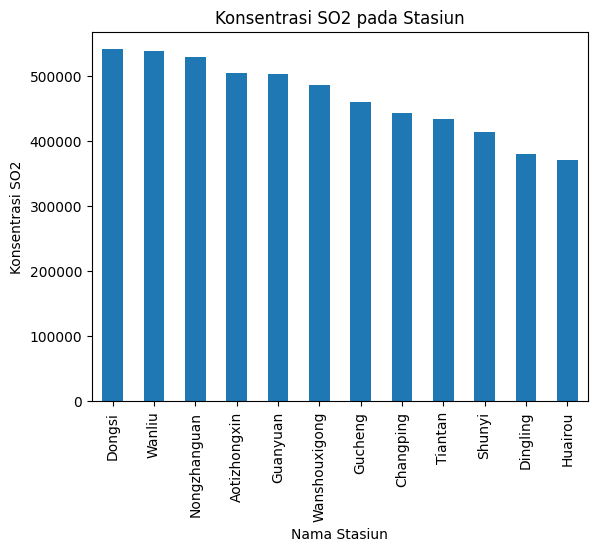

In [18]:
top_so2.plot.bar()
plt.title("Konsentrasi SO2 pada Stasiun")
plt.ylabel("Konsentrasi SO2")
plt.xlabel("Nama Stasiun")

### Pertanyaan 2:

<ipython-input-19-d2b755b8c47b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_aotizhongxin['year'] = air_aotizhongxin['datetime'].dt.year


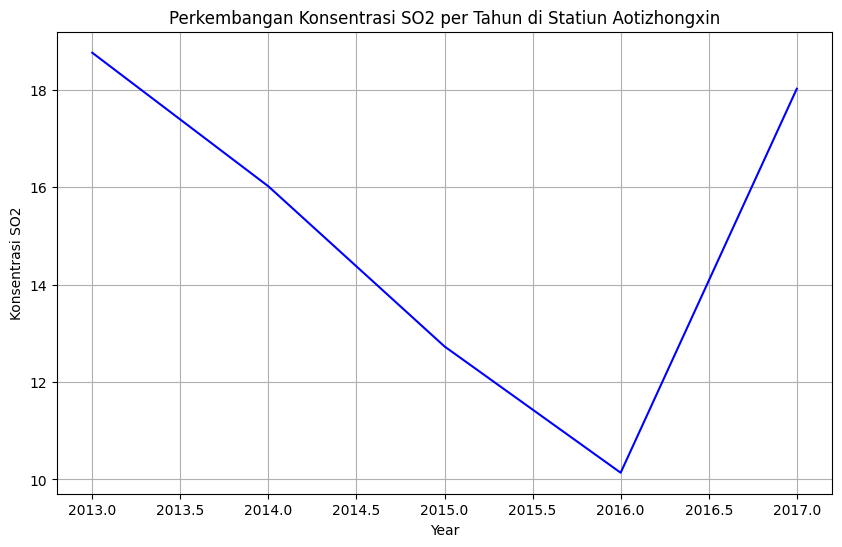

In [19]:
# Ambil data pada stasiun Aotizhongxin
air_aotizhongxin = air_quality[air_quality['station'] == 'Aotizhongxin']

# Ambil year dari kolom "datetime"
air_aotizhongxin['year'] = air_aotizhongxin['datetime'].dt.year

# Dapatkan rata-rata konsentrasi SO2
average_so2_by_year = air_aotizhongxin.groupby('year')['SO2'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_so2_by_year.index, average_so2_by_year, linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Konsentrasi SO2')
plt.title('Perkembangan Konsentrasi SO2 per Tahun di Statiun Aotizhongxin')
plt.grid(True)
plt.show()

## Conclusion

- Stasiun yang memiliki konsentrasi SO2 paling besar adalah Stasiun Dongsi.
- Pada Statiun Aotizhongxin, konsentrasi SO2 menurun dari tahun 2013 ke tahun 2016, tetapi naik lagi hingga tahun 2017.
- Nilai konsentrasi O3 paling besar pada Statiun Gucheng adalah 182.
- Jumlah statiun yang ada pada dataset adalah 12.